# Projeto Estatística I | Análise Exploratória de Dados (EDA) em Python

**Motivação:** Gostaríamos de entender como a preparação prévia dos alunos se relaciona às notas alcançadas em testes de conhecimento em matemática, escrita e leitura.

**Hipótese:** Estudantes que completaram o curso de preparação para o teste têm notas maiores.

**H0 (hipótese nula):** A média das notas totais dos testes é igual para alunos que completaram e não completaram o curso.

*média notas com preparação = média notas sem preparação*

**H1 (hipótese alternativa):** A média das notas totais dos testes é diferente para alunos que completaram e não completaram o curso.

*média notas com preparação <> média notas sem preparação*

# Importando Bibliotecas e Módulos

In [1]:
# Bibliotecas
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

# Módulos
import funcoes_graficos as fns 

# Carregando Dados

In [2]:
URL = 'https://raw.githubusercontent.com/tainahguerras/Estatistica-ADA-Santander/main/data/study_performance.csv?token=GHSAT0AAAAAACPQTJF2RXJM7QLNQAEEFDSKZQMSP6A'
data = pd.read_csv(URL)

# Exploração Inicial

In [3]:
print('Forma do dataset:',data.shape)
data.head()

Forma do dataset: (1000, 8)


,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


Abaixo, resumo das informações contidas no dataset:

| Colunas                     | Descrição                                      | Dtype  | Classificação        |
|-----------------------------|------------------------------------------------|--------|----------------------| 
| gender                      | Gênero do aluno                                | object | Qualitativa Nominal  |
| race_ethnicity              | Grupo étnico do aluno                          | object | Qualitativa Nominal  | 
| parental_level_of_education | Último nível de educação dos pais              | object | Qualitativa Ordinal  |
| lunch                       | Almoço antes do teste                          | object | Qualitativa Nominal  |
| test_preparation_course     | Finalização do curso preparatório para o teste | object | Qualitativa Nominal  |
| math_score                  | Nota em matemática                             | int64  | Quantitativa Discreta|
| reading_score               | Nota em leitura                                | int64  | Quantitativa Discreta|
| writing_score               | Nota em escrita                                | int64  | Quantitativa Discreta|

### Checando valores faltantes

In [5]:
data.isnull().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

### Checando registros duplicados

In [7]:
data.duplicated().sum() 

0

### Descrição das Variáveis Categóricas

In [9]:
vars_cat = ['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch', 'test_preparation_course']

print('Proporção das categorias, em %:\n')

for var in vars_cat:
    print(data[var].value_counts(True)*100, '\n')

Proporção das categorias, em %:

gender
female    51.8
male      48.2
Name: proportion, dtype: float64 

race_ethnicity
group C    31.9
group D    26.2
group B    19.0
group E    14.0
group A     8.9
Name: proportion, dtype: float64 

parental_level_of_education
some college          22.6
associate's degree    22.2
high school           19.6
some high school      17.9
bachelor's degree     11.8
master's degree        5.9
Name: proportion, dtype: float64 

lunch
standard        64.5
free/reduced    35.5
Name: proportion, dtype: float64 

test_preparation_course
none         64.2
completed    35.8
Name: proportion, dtype: float64 



### Descrição das Variáveis Quantitativas

In [10]:
data.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


Teste de Matemática

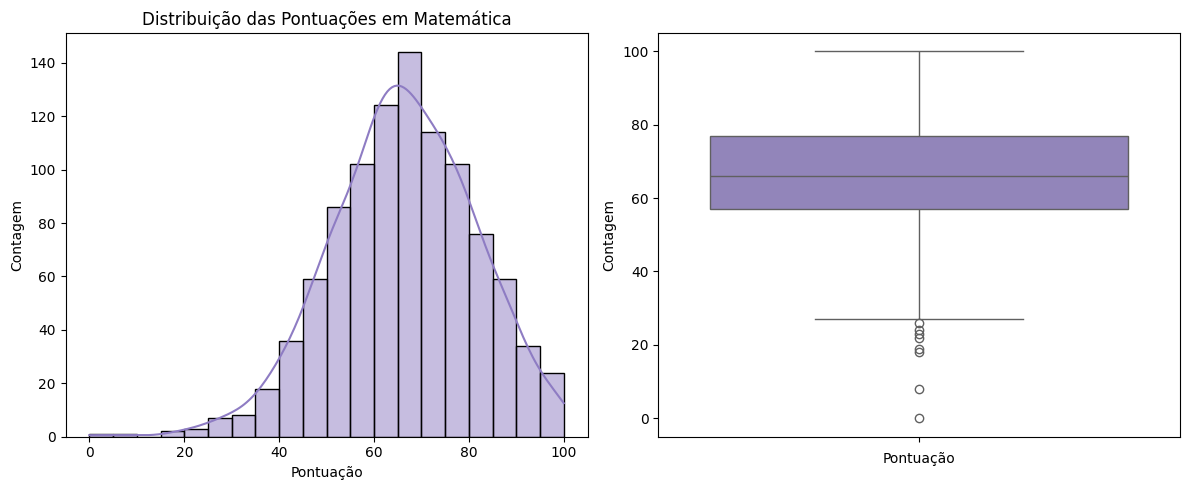

In [5]:
fns.plot_histogram_boxplot(dados=data['math_score'], titulo='Distribuição das Pontuações em Matemática', xlabel='Pontuação', ylabel='Contagem')

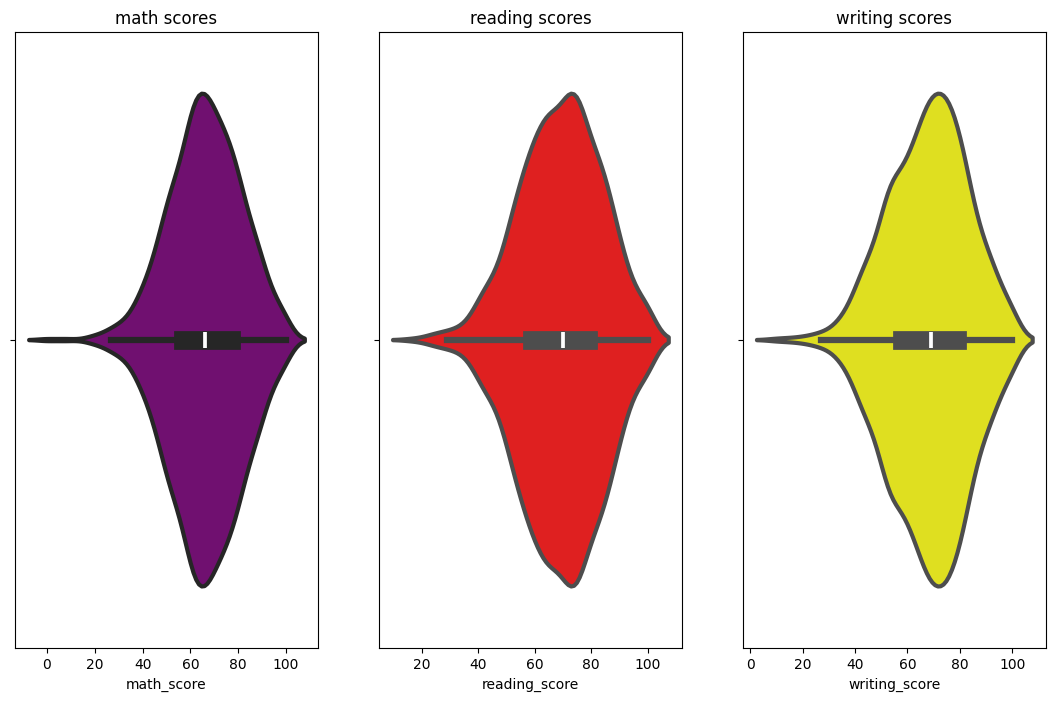

In [4]:
plt.figure(figsize=(18,8))
plt.subplot(1, 4, 1)
plt.title('math scores')
sns.violinplot(x='math_score',data=data,color='purple',linewidth=3)
plt.subplot(1, 4, 2)
plt.title('reading scores')
sns.violinplot(x='reading_score',data=data,color='red',linewidth=3)
plt.subplot(1, 4, 3)
plt.title('writing scores')
sns.violinplot(x='writing_score',data=data,color='yellow',linewidth=3)
plt.show()

Teste de Leitura

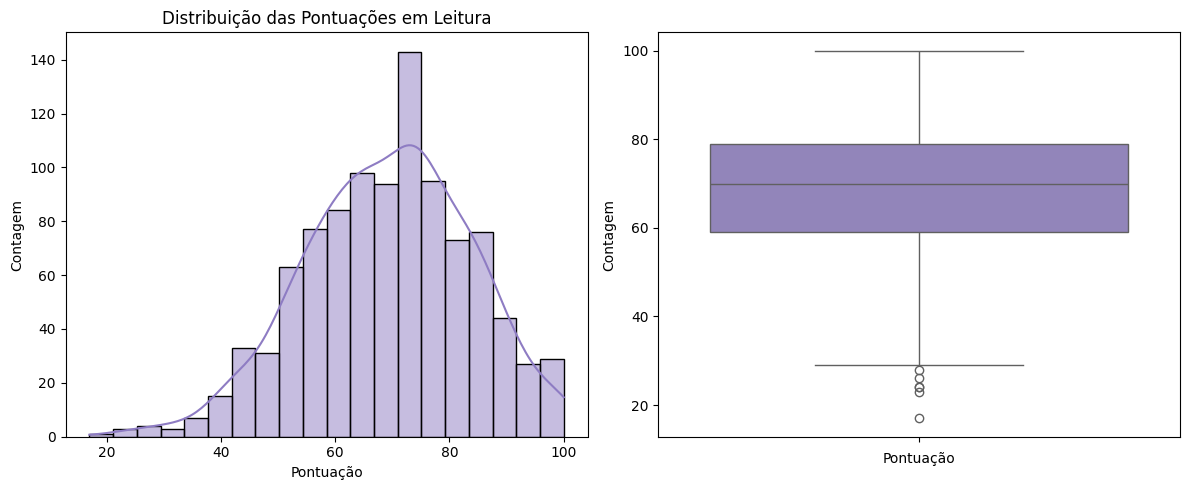

In [6]:
fns.plot_histogram_boxplot(dados=data['reading_score'], titulo='Distribuição das Pontuações em Leitura', xlabel='Pontuação', ylabel='Contagem')

Teste de Escrita

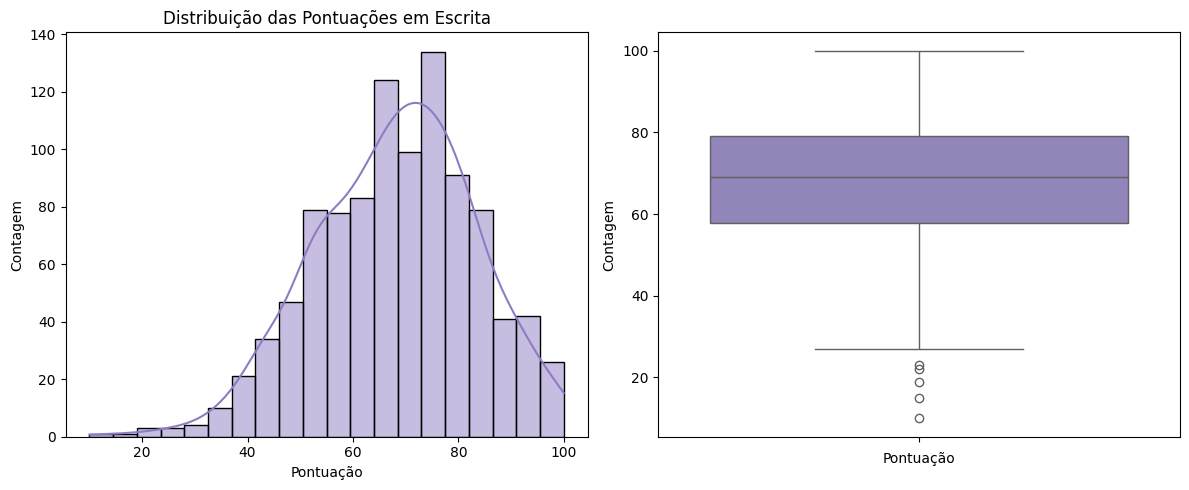

In [7]:
fns.plot_histogram_boxplot(dados=data['writing_score'], titulo='Distribuição das Pontuações em Escrita', xlabel='Pontuação', ylabel='Contagem')

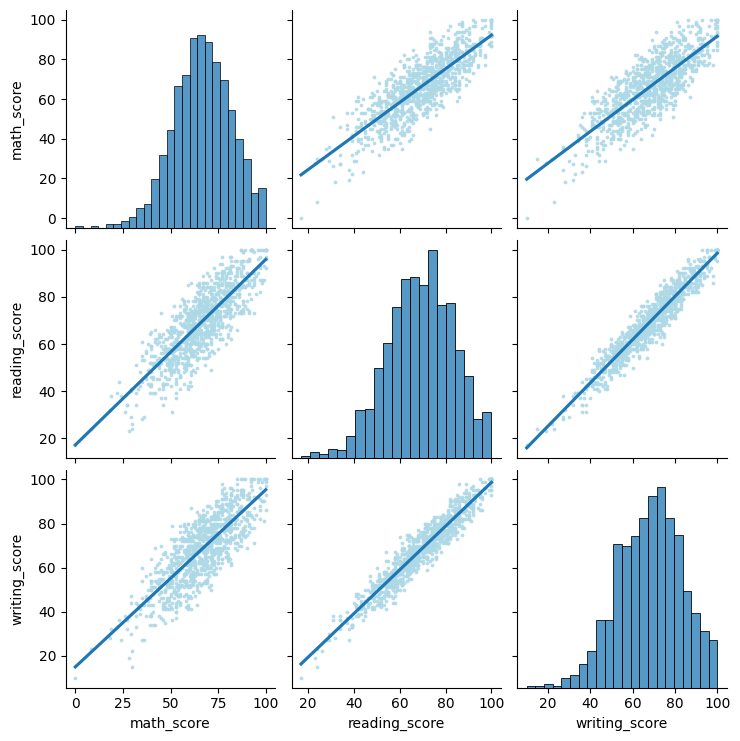

In [8]:
fns.cria_pairplot(data)

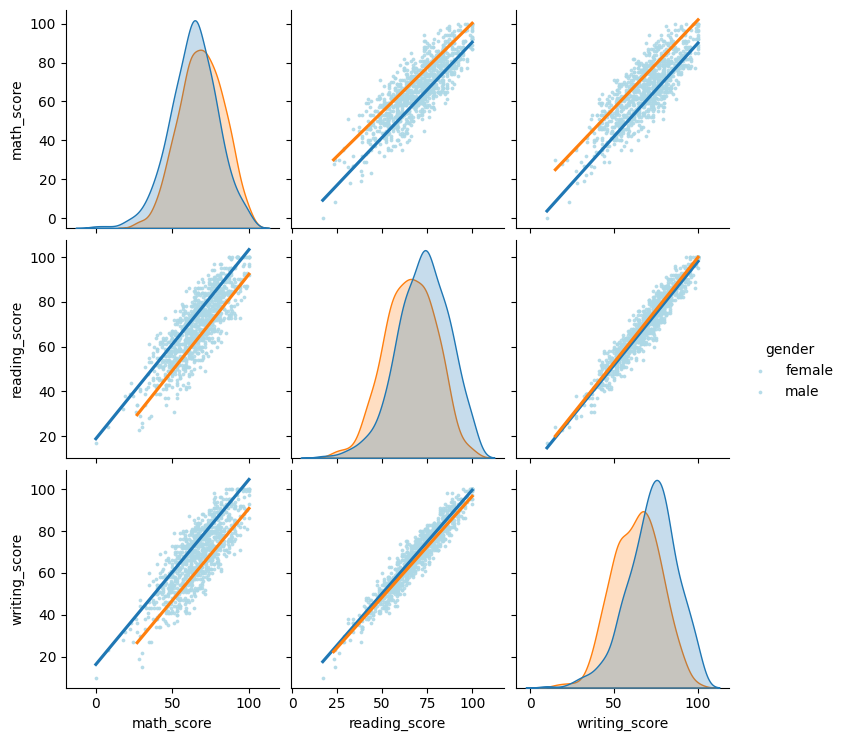

In [11]:
fns.cria_pairplot(data, hue='gender')

Tentar entender outliers? O que fazer com eles?

Análises que podem ser feitas:
- Correlação entre variáveis categoricas e notas do teste separadamente
- Correlação entre variáveis categoricas e média das notas

    Formas de observar correlação:
    - Índices (Pearson, Spearman)
    - Gráficos de dispersão
    - Heatmaps (?) (não sei como funciona)